In [1]:
from __future__ import print_function

import sys, os
import numpy as np
from time import time
import matplotlib.pyplot as plt 

sys.path.append('/home/xilinx')
os.environ['XILINX_XRT'] = '/usr'
from pynq import Overlay
from pynq import allocate

In [2]:
print("Entry:", sys.argv[0])
print("System argument(s):", len(sys.argv))

print("Start of \"" + sys.argv[0] + "\"")

overlay = Overlay('/home/xilinx/jupyter_notebooks/Untitled Folder/design_1.bit')

Entry: /usr/local/share/pynq-venv/lib/python3.8/site-packages/ipykernel_launcher.py
System argument(s): 3
Start of "/usr/local/share/pynq-venv/lib/python3.8/site-packages/ipykernel_launcher.py"


In [3]:
from pynq import ps

print(ps.Clocks.fclk0_mhz)
print(ps.Clocks.cpu_mhz)

62.5
650.0


In [4]:
ip = overlay.model_0
mmio = ip.mmio
register_map = ip.register_map
registers = register_map._register_classes

In [5]:
for name, reg in registers.items():
    print(name, reg)

CTRL (<class 'pynq.registers.RegisterCTRL'>, 0, 32, None, None, 'read-write')
GIER (<class 'pynq.registers.RegisterGIER'>, 4, 32, None, None, 'read-write')
IP_IER (<class 'pynq.registers.RegisterIP_IER'>, 8, 32, None, None, 'read-write')
IP_ISR (<class 'pynq.registers.RegisterIP_ISR'>, 12, 32, None, None, 'read-write')
data_in_noise_1 (<class 'pynq.registers.Registerdata_in_noise_1'>, 16, 32, None, None, 'write-only')
data_in_noise_2 (<class 'pynq.registers.Registerdata_in_noise_2'>, 20, 32, None, None, 'write-only')
data_out_1 (<class 'pynq.registers.Registerdata_out_1'>, 28, 32, None, None, 'write-only')
data_out_2 (<class 'pynq.registers.Registerdata_out_2'>, 32, 32, None, None, 'write-only')


In [6]:
input_buffer_size = 100000
output_buffer_size = 784000

input_buffer = allocate(shape=(input_buffer_size, ), dtype=np.uint8)
output_buffer = allocate(shape=(output_buffer_size, ), dtype=np.float32)
register_map.data_in_noise_1.data_in_noise = input_buffer.device_address
register_map.data_out_1.data_out = output_buffer.device_address

In [41]:
def hw(data_in):
    input_buffer[:input_buffer_size] = data_in
    
    register_map.CTRL.AP_START = 1
    
    while(register_map.CTRL.AP_DONE == 0):
        pass
    
    return output_buffer

In [42]:
image_nums = 1000

In [43]:
np.random.seed(1)

test_data = np.random.randint(0, 127, (100*image_nums), dtype=np.uint8)
test_data

array([ 37, 116,  65, ...,  49, 104, 121], dtype=uint8)

In [50]:
start = time()
out = hw(test_data)
end = time()

In [37]:
output = (np.array(out).reshape(1000, 28, 28))

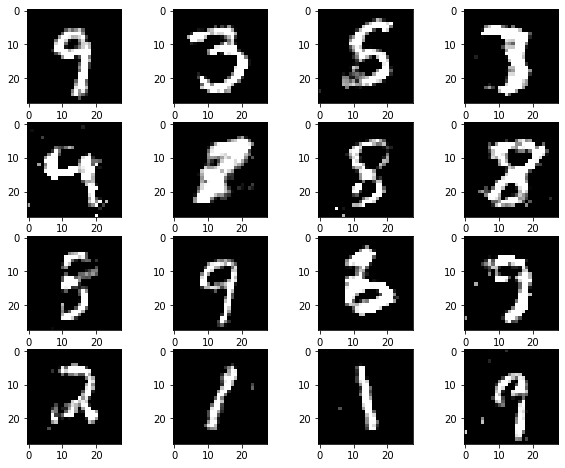

In [46]:
plt.rcParams['figure.figsize'] = (10, 8)
    
for index, image in enumerate(output[:16]):
    plt.subplot(4, 4, index+1)
    plt.imshow(image.reshape(28, 28), cmap='gray')

In [52]:
print('Time: '+str(end - start)+'s')
print('FPS: ', 1/((end - start) / image_nums))

Time: 0.6345765590667725s
FPS:  1575.8539859566044
